# Poetry Generator

## Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Define Parameters

In [41]:
filepath = "poetry_laur.txt"
save_file_path = 'predicted_poetry.txt'
PADDING = 'pre'
TRUNC = 'pre'

VOCAB_SIZE = 10000
EMB_DIM = 128

OPTIMIZER = 'adam'
LOSS = 'categorical_crossentropy'
METRICS = ['acc']
EPOCHS = 500
BATCH_SIZE = 128
VAL_SPLIT = 0.1

SEEDER = 'angels stole thy pure love'    ## Seeder word to start prediction of poetry
NUM_PREDICTIONS = 1000

model_name = "model_laur.h5"

data = "This is some random statement \n being used as placeholder for the actual data that is to be \n imported later from a file."

## Load Data

In [3]:
with open(filepath) as f:
    data = f.read()
    f.close()
data = data.replace('\n', ' \n<>')
sentences = data.lower().split('<>')
print(len(sentences))
print(sentences[1])
print(len(sentences[1]))

1693
and you that are blooming in your prime 

41


## Tokenize Data

In [4]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
total_words = len(word_index) + 1
print(total_words)
print(word_index['\n'])

2691
1


In [5]:
## create reverse_word_index
reverse_word_index = {}
for word, i in word_index.items():
    reverse_word_index[i] = word
print(reverse_word_index)

{1: '\n', 2: 'the', 3: 'and', 4: 'i', 5: 'to', 6: 'a', 7: 'of', 8: 'my', 9: 'in', 10: 'me', 11: 'for', 12: 'you', 13: 'all', 14: 'was', 15: 'she', 16: 'that', 17: 'on', 18: 'with', 19: 'her', 20: 'but', 21: 'as', 22: 'when', 23: 'love', 24: 'is', 25: 'your', 26: 'it', 27: 'will', 28: 'from', 29: 'by', 30: 'they', 31: 'be', 32: 'are', 33: 'so', 34: 'he', 35: 'old', 36: 'no', 37: 'oh', 38: 'ill', 39: 'at', 40: 'one', 41: 'his', 42: 'there', 43: 'were', 44: 'heart', 45: 'down', 46: 'now', 47: 'we', 48: 'where', 49: 'young', 50: 'never', 51: 'go', 52: 'come', 53: 'then', 54: 'did', 55: 'not', 56: 'said', 57: 'away', 58: 'their', 59: 'sweet', 60: 'them', 61: 'green', 62: 'if', 63: 'take', 64: 'our', 65: 'like', 66: 'night', 67: 'day', 68: 'o', 69: 'out', 70: 'fair', 71: 'this', 72: 'town', 73: 'have', 74: 'can', 75: 'true', 76: 'its', 77: 'thou', 78: 'see', 79: 'dear', 80: 'more', 81: 'theres', 82: 'or', 83: 'had', 84: 'would', 85: 'over', 86: 'hear', 87: 'up', 88: 'ive', 89: 'through', 90:

## Change Sentences to Sequences

In [6]:
sequences = tokenizer.texts_to_sequences(sentences)
new_seq = []
for row in sequences:
    for i in range(2, len(row)+1):
        new_seq.append(row[:i])
padded_seq = pad_sequences(new_seq, padding=PADDING, truncating=TRUNC)
print(padded_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 52 13]


## Extract trainX and trainY from sequences

In [7]:
trainX = padded_seq[:,:-1]
trainY = padded_seq[:,-1]
trainY = tf.keras.utils.to_categorical(trainY, num_classes=total_words)

INP_LEN = trainX.shape[1]
OUT_LEN = trainY.shape[1]

print(trainX.shape)
print(trainY.shape)

(13730, 16)
(13730, 2691)


## Define Callback

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, log={}):
        if (log.get('acc')>0.90):
            self.model.stop_training = True
            print("\n Stopped training since model reached accuracy of 90%")
callback = myCallback()

## Define Model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total_words, EMB_DIM, input_length=INP_LEN),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 128)           344448    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 2691)              174915    
Total params: 560,579
Trainable params: 560,579
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [11]:
history = model.fit(trainX, trainY, validation_split=VAL_SPLIT, verbose=1, epochs = EPOCHS, batch_size=BATCH_SIZE, callbacks=[callback])

Train on 12357 samples, validate on 1373 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
12357/12357 [==============================] - 9s 729us/sample - loss: 6.7922 - acc: 0.1160 - val_loss: 6.2226 - val_acc: 0.1253
Epoch 2/500
12357/12357 [==============================] - 6s 499us/sample - loss: 6.0098 - acc: 0.1230 - val_loss: 6.2186 - val_acc: 0.1253
Epoch 3/500
12357/12357 [==============================] - 6s 474us/sample - loss: 5.8807 - acc: 0.1230 - val_loss: 6.2006 - val_acc: 0.1253
Epoch 4/500
12357/12357 [==============================] - 6s 470us/sample - loss: 5.7892 - acc: 0.1230 - val_loss: 6.2192 - val_acc: 0.1253
Epoch 5/500
12357/12357 [==============================] - 6s 469us/sample - loss: 5.7213 - acc: 0.1283 - val_loss: 6.2344 - val_acc: 0.1333
Epoch 6/500
12357/12357 [==============================] - 6s 505us/sample - loss: 5.6626 - acc: 0.1451 - val_loss: 6.2509 - val_acc: 0.1420
Epoch 7/500
12357/12357 [==============================] 

12357/12357 [==============================] - 6s 466us/sample - loss: 3.4108 - acc: 0.3395 - val_loss: 7.0137 - val_acc: 0.1508
Epoch 57/500
12357/12357 [==============================] - 6s 516us/sample - loss: 3.3747 - acc: 0.3434 - val_loss: 7.0259 - val_acc: 0.1544
Epoch 58/500
12357/12357 [==============================] - 6s 477us/sample - loss: 3.3290 - acc: 0.3483 - val_loss: 7.0651 - val_acc: 0.1508
Epoch 59/500
12357/12357 [==============================] - 6s 468us/sample - loss: 3.2899 - acc: 0.3587 - val_loss: 7.0613 - val_acc: 0.1500
Epoch 60/500
12357/12357 [==============================] - 6s 483us/sample - loss: 3.2439 - acc: 0.3621 - val_loss: 7.1071 - val_acc: 0.1508
Epoch 61/500
12357/12357 [==============================] - 6s 493us/sample - loss: 3.2038 - acc: 0.3651 - val_loss: 7.1468 - val_acc: 0.1537
Epoch 62/500
12357/12357 [==============================] - 6s 497us/sample - loss: 3.1643 - acc: 0.3728 - val_loss: 7.1591 - val_acc: 0.1515
Epoch 63/500
12357/

12357/12357 [==============================] - 6s 482us/sample - loss: 1.8999 - acc: 0.5946 - val_loss: 8.3313 - val_acc: 0.1355
Epoch 114/500
12357/12357 [==============================] - 6s 510us/sample - loss: 1.8782 - acc: 0.5935 - val_loss: 8.3747 - val_acc: 0.1333
Epoch 115/500
12357/12357 [==============================] - 7s 559us/sample - loss: 1.8422 - acc: 0.6031 - val_loss: 8.3447 - val_acc: 0.1318
Epoch 116/500
12357/12357 [==============================] - 7s 527us/sample - loss: 1.8105 - acc: 0.6122 - val_loss: 8.3700 - val_acc: 0.1384
Epoch 117/500
12357/12357 [==============================] - 7s 568us/sample - loss: 1.7936 - acc: 0.6159 - val_loss: 8.4054 - val_acc: 0.1333
Epoch 118/500
12357/12357 [==============================] - 6s 504us/sample - loss: 1.7738 - acc: 0.6201 - val_loss: 8.4138 - val_acc: 0.1377
Epoch 119/500
12357/12357 [==============================] - 6s 501us/sample - loss: 1.7737 - acc: 0.6180 - val_loss: 8.4438 - val_acc: 0.1413
Epoch 120/500

12357/12357 [==============================] - 7s 528us/sample - loss: 1.2403 - acc: 0.7285 - val_loss: 9.0820 - val_acc: 0.1282
Epoch 171/500
12357/12357 [==============================] - 6s 488us/sample - loss: 1.2209 - acc: 0.7313 - val_loss: 9.1055 - val_acc: 0.1289
Epoch 172/500
12357/12357 [==============================] - 6s 481us/sample - loss: 1.2130 - acc: 0.7320 - val_loss: 9.1313 - val_acc: 0.1311
Epoch 173/500
12357/12357 [==============================] - 6s 490us/sample - loss: 1.2043 - acc: 0.7353 - val_loss: 9.1246 - val_acc: 0.1275
Epoch 174/500
12357/12357 [==============================] - 6s 490us/sample - loss: 1.2007 - acc: 0.7353 - val_loss: 9.1107 - val_acc: 0.1340
Epoch 175/500
12357/12357 [==============================] - 6s 485us/sample - loss: 1.2036 - acc: 0.7350 - val_loss: 9.1441 - val_acc: 0.1340
Epoch 176/500
12357/12357 [==============================] - 6s 484us/sample - loss: 1.1975 - acc: 0.7355 - val_loss: 9.1554 - val_acc: 0.1304
Epoch 177/500

12357/12357 [==============================] - 6s 490us/sample - loss: 0.9136 - acc: 0.7942 - val_loss: 9.5875 - val_acc: 0.1194
Epoch 228/500
12357/12357 [==============================] - 6s 458us/sample - loss: 0.8971 - acc: 0.7968 - val_loss: 9.6094 - val_acc: 0.1173
Epoch 229/500
12357/12357 [==============================] - 6s 474us/sample - loss: 0.8974 - acc: 0.7969 - val_loss: 9.6140 - val_acc: 0.1202
Epoch 230/500
12357/12357 [==============================] - 7s 534us/sample - loss: 0.8903 - acc: 0.8000 - val_loss: 9.6282 - val_acc: 0.1173
Epoch 231/500
12357/12357 [==============================] - 7s 582us/sample - loss: 0.8896 - acc: 0.7985 - val_loss: 9.6225 - val_acc: 0.1165
Epoch 232/500
12357/12357 [==============================] - 6s 484us/sample - loss: 0.8813 - acc: 0.8011 - val_loss: 9.6395 - val_acc: 0.1180
Epoch 233/500
12357/12357 [==============================] - 6s 481us/sample - loss: 0.8676 - acc: 0.8046 - val_loss: 9.6426 - val_acc: 0.1180
Epoch 234/500

12357/12357 [==============================] - 6s 462us/sample - loss: 0.6941 - acc: 0.8376 - val_loss: 9.9412 - val_acc: 0.1238
Epoch 284/500
12357/12357 [==============================] - 6s 475us/sample - loss: 0.6941 - acc: 0.8355 - val_loss: 9.9086 - val_acc: 0.1209
Epoch 285/500
12357/12357 [==============================] - 7s 570us/sample - loss: 0.6901 - acc: 0.8367 - val_loss: 9.9400 - val_acc: 0.1173
Epoch 286/500
12357/12357 [==============================] - 7s 539us/sample - loss: 0.6897 - acc: 0.8367 - val_loss: 9.9795 - val_acc: 0.1187
Epoch 287/500
12357/12357 [==============================] - 6s 511us/sample - loss: 0.6956 - acc: 0.8357 - val_loss: 9.9164 - val_acc: 0.1216
Epoch 288/500
12357/12357 [==============================] - 6s 466us/sample - loss: 0.7139 - acc: 0.8326 - val_loss: 9.9332 - val_acc: 0.1209
Epoch 289/500
12357/12357 [==============================] - 6s 454us/sample - loss: 0.7011 - acc: 0.8332 - val_loss: 9.9822 - val_acc: 0.1180
Epoch 290/500

12357/12357 [==============================] - 6s 479us/sample - loss: 0.5775 - acc: 0.8543 - val_loss: 10.2499 - val_acc: 0.1129
Epoch 341/500
12357/12357 [==============================] - 6s 467us/sample - loss: 0.5707 - acc: 0.8589 - val_loss: 10.2562 - val_acc: 0.1180
Epoch 342/500
12357/12357 [==============================] - 6s 460us/sample - loss: 0.5774 - acc: 0.8558 - val_loss: 10.2738 - val_acc: 0.1173
Epoch 343/500
12357/12357 [==============================] - 6s 473us/sample - loss: 0.5753 - acc: 0.8586 - val_loss: 10.1937 - val_acc: 0.1224
Epoch 344/500
12357/12357 [==============================] - 6s 474us/sample - loss: 0.5960 - acc: 0.8515 - val_loss: 10.2894 - val_acc: 0.1085
Epoch 345/500
12357/12357 [==============================] - 6s 505us/sample - loss: 0.5976 - acc: 0.8516 - val_loss: 10.2503 - val_acc: 0.1173
Epoch 346/500
12357/12357 [==============================] - 6s 471us/sample - loss: 0.5787 - acc: 0.8547 - val_loss: 10.2782 - val_acc: 0.1151
Epoch 

Epoch 397/500
12357/12357 [==============================] - 6s 483us/sample - loss: 0.4849 - acc: 0.8706 - val_loss: 10.5474 - val_acc: 0.1165
Epoch 398/500
12357/12357 [==============================] - 6s 492us/sample - loss: 0.4975 - acc: 0.8687 - val_loss: 10.5412 - val_acc: 0.1194
Epoch 399/500
12357/12357 [==============================] - 7s 540us/sample - loss: 0.5088 - acc: 0.8653 - val_loss: 10.5369 - val_acc: 0.1216
Epoch 400/500
12357/12357 [==============================] - 7s 543us/sample - loss: 0.5780 - acc: 0.8507 - val_loss: 10.5129 - val_acc: 0.1194
Epoch 401/500
12357/12357 [==============================] - 6s 521us/sample - loss: 0.5707 - acc: 0.8502 - val_loss: 10.5209 - val_acc: 0.1165
Epoch 402/500
12357/12357 [==============================] - 6s 484us/sample - loss: 0.5703 - acc: 0.8533 - val_loss: 10.5091 - val_acc: 0.1158
Epoch 403/500
12357/12357 [==============================] - 6s 487us/sample - loss: 0.5653 - acc: 0.8538 - val_loss: 10.5189 - val_acc:

Epoch 454/500
12357/12357 [==============================] - 7s 544us/sample - loss: 0.4540 - acc: 0.8757 - val_loss: 10.6809 - val_acc: 0.1202
Epoch 455/500
12357/12357 [==============================] - 6s 491us/sample - loss: 0.4511 - acc: 0.8751 - val_loss: 10.6826 - val_acc: 0.1202loss: 0.4547 - ac
Epoch 456/500
12357/12357 [==============================] - 6s 483us/sample - loss: 0.4495 - acc: 0.8751 - val_loss: 10.7087 - val_acc: 0.1158
Epoch 457/500
12357/12357 [==============================] - 7s 533us/sample - loss: 0.4469 - acc: 0.8753 - val_loss: 10.7129 - val_acc: 0.1165
Epoch 458/500
12357/12357 [==============================] - 6s 492us/sample - loss: 0.4434 - acc: 0.8767 - val_loss: 10.7313 - val_acc: 0.1136
Epoch 459/500
12357/12357 [==============================] - 6s 481us/sample - loss: 0.4401 - acc: 0.8776 - val_loss: 10.7219 - val_acc: 0.1143
Epoch 460/500
12357/12357 [==============================] - 6s 486us/sample - loss: 0.4402 - acc: 0.8763 - val_loss: 1

## Save Model

In [12]:
model.save(model_name)

## Plot Results

C:\Users\XARC\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XARC\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XARC\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XARC\Anaconda3\lib\site-p

<Figure size 432x288 with 0 Axes>

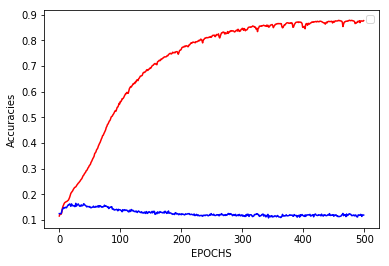

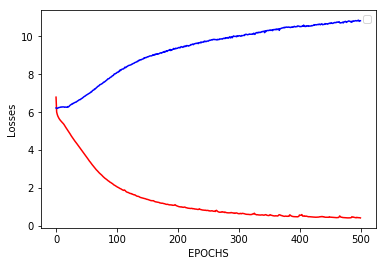

<Figure size 432x288 with 0 Axes>

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCHS)

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracies')
plt.legend('Train Acc', 'Val Acc')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('EPOCHS')
plt.ylabel('Losses')
plt.legend('Train Loss', 'Val Loss')
plt.figure()

## Generate Poetry by iterating over the predictor from the model

In [47]:
sentence = SEEDER.lower()
corpus = SEEDER.lower()
new_line = False
print (sentence, end=' ')
for i in range(NUM_PREDICTIONS):
    seq = tokenizer.texts_to_sequences([sentence])
    seq = pad_sequences(seq, padding=PADDING, truncating=TRUNC, maxlen=INP_LEN)
    new_word = model.predict_classes(seq)
    new_word = reverse_word_index[new_word[0]]
    if new_line:
        corpus += new_word
        new_line = False
    else:
        corpus += ' ' + new_word
    
    if new_word=='\n':
        sentence = reverse_word_index[seq[0][-1]]
        new_line = True
        print (new_word, end='')
        #sentence = reverse_word_index[random.randint(1, total_words)]
    else:
        sentence += ' ' + new_word
        print (new_word, end=' ')


angels stole thy pure love 
sends his early ray 
i beg for your provost and fellows of trinity 
is a hell for a lonely my bride 
a prison ship lies waiting in the bay 
a big mauser bullet got stuck in the firelights 
is the grass my hole in my breast 
for the black velvet street my darling 
are thinking of the rose of the summer 
a fade of yore 
in the morning early 
i was standing there and asked 
me was i hired wages i required i was almost tired of the 
day that i first saw the light 
no other leave see by the night 
from ballygrant 
in the island 
to me my sailed at brooks 
entwine itself verdantly still 
for mallow water crying 
cockles and mussels alive alive o 
when i was a young man i heard my father say 
that if they were bound for a ball or a bath 
a drink love round a customer 
i spent with me it 
was early early in the spring 
in the morning early 
i was standing there and asked 
me was i hired wages i required i was almost tired of the 
day that i first saw the light 
no o

## Save Poetry in a file

In [49]:
try:
    with open(save_file_path, 'w') as f:
        f.write(corpus)
        f.close()
except:
    print("\nWrite was Unsuccessful")